In [2]:
!pip install tensorflow

Import required libraies

In [92]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import gridspec
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

In [3]:
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


Data Pre-Processing and Exploratory Data Analysis (EDA)

1) Checking for null values

In [4]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


2) Checking Fraud vs Non-fraud transactions distribution (Categorical values)


<ipython-input-25-50ec8754aa88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df, ax=ax, palette=colors)


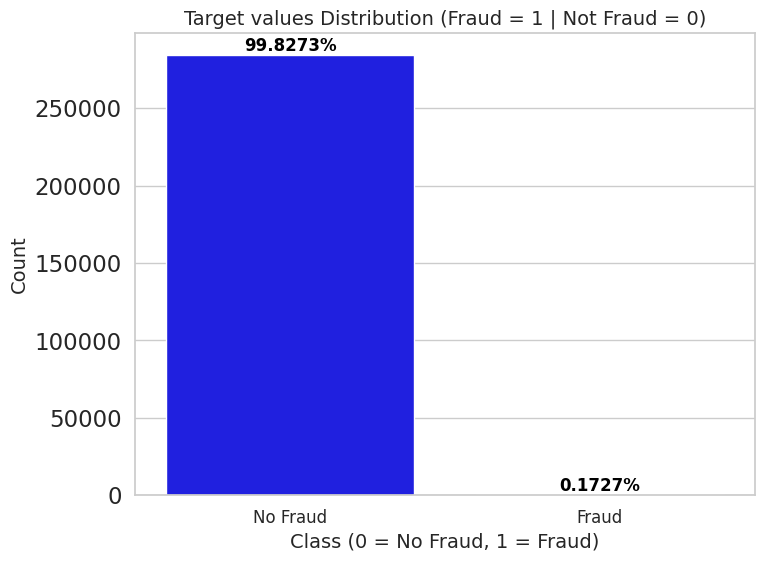


Non-Fraud 284315
Fraud 492


In [25]:
colors = ['Blue', 'Red']
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Class',data=df, ax=ax, palette=colors)

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.4f}%'  # Higher precision due to class imbalance
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Target values Distribution (Fraud = 1 | Not Fraud = 0)', fontsize=14)
plt.xlabel('Class (0 = No Fraud, 1 = Fraud)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Fraud', 'Fraud'], fontsize=12)
plt.show()

print('\nNon-Fraud', df['Class'].value_counts()[0])
print('Fraud', df['Class'].value_counts()[1])

I conclude that the given data is highly imbalanced because the frauds happen in very rare cases.

4) Checking the features

In [27]:
Frauds = df[df.Class == 1]
Not_frauds = df[df.Class == 0]

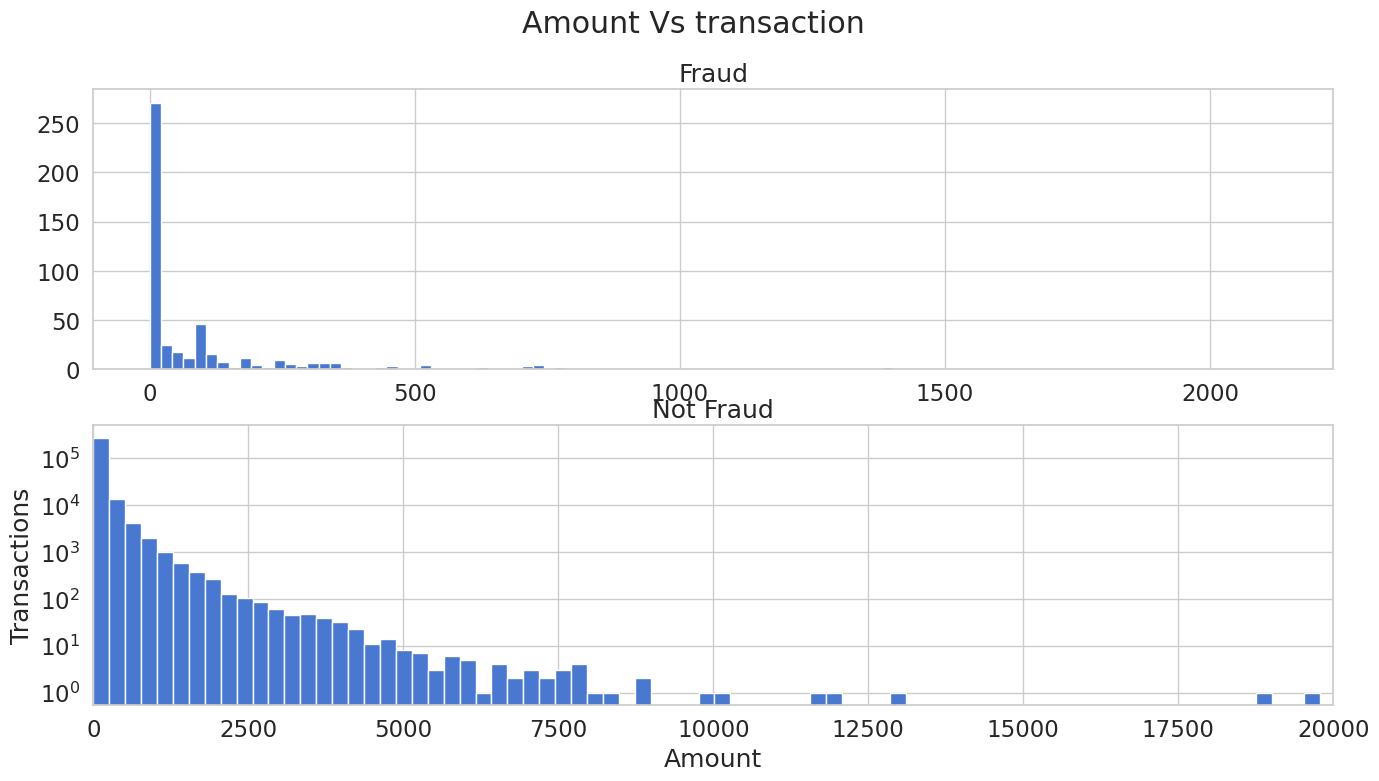

In [35]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (16, 8))
f.suptitle('Amount Vs transaction')


ax1.hist(Frauds.Amount, bins = 100)
ax1.set_title('Fraud')

ax2.hist(Not_frauds.Amount, bins = 100)
ax2.set_title('Not Fraud')

plt.xlabel('Amount')
plt.ylabel('Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

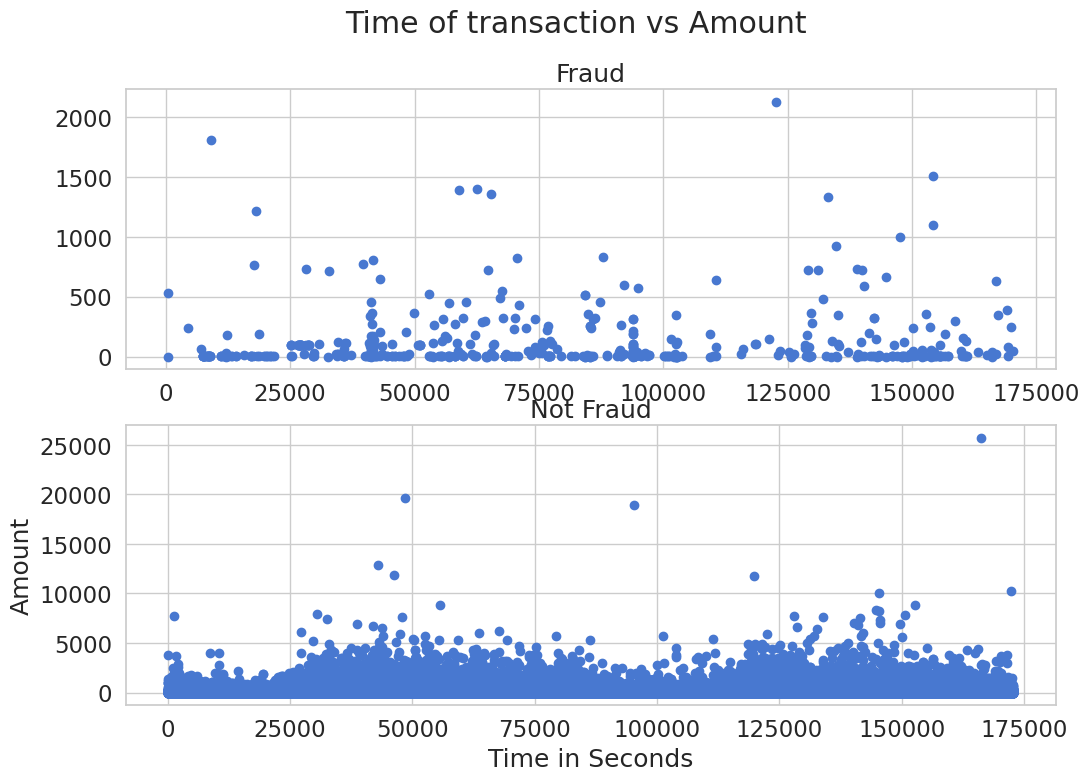

In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))
f.suptitle('Time of transaction vs Amount')

ax1.scatter(Frauds.Time, Frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(Not_frauds.Time, Not_frauds.Amount)
ax2.set_title('Not Fraud')

plt.xlabel('Time in Seconds')
plt.ylabel('Amount')
plt.show()

In [49]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Class','Time','Amount'])  # Features
y = df['Class']

# Compute mutual information scores
mi_scores = mutual_info_classif(X, y, discrete_features=False)

# Convert to a DataFrame for better visualization
mi_scores_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Select top features (e.g., top 15 features)
top_features = mi_scores_df.head(15)['Feature'].tolist()

# Create a new dataset with selected features
ordered_top_features = [feature for feature in df.columns if feature in top_features]

df_selected_features = df[['Time']+ ordered_top_features + ['Amount','Class']]

df_selected_features.head()

,Time,V2,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,Amount,Class
0,0.0,-0.072781,2.536347,1.378155,-0.338321,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,-0.018307,0.133558,149.62,0
1,0.0,0.266151,0.166480,0.448154,0.060018,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.225775,-0.008983,2.69,0
2,1.0,-1.340163,1.773209,0.379780,-0.503198,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0.247998,-0.055353,378.66,0
3,1.0,-0.185226,1.792993,-0.863291,-0.010309,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,0.062723,123.50,0
4,2.0,0.877737,1.548718,0.403034,-0.407193,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,-0.009431,0.219422,69.99,0


In [93]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# Separate features and target variable
X = df_selected_features.drop(columns=['Class'])
y = df_selected_features['Class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Define Autoencoder model
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2)  # Reduce to half of input dimensions

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')


autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, shuffle=True, validation_data=(X_test, X_test), verbose=1)
encoder = Model(inputs=input_layer, outputs=encoded)

# Transform data using encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

Epoch 1/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.9134 - val_loss: 0.7707
Epoch 2/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 0.7493 - val_loss: 0.7580
Epoch 3/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.7706 - val_loss: 0.7542
Epoch 4/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.7549 - val_loss: 0.7526
Epoch 5/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.7961 - val_loss: 0.7499
Epoch 6/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7319 - val_loss: 0.7468
Epoch 7/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.7172 - val_loss: 0.7460
Epoch 8/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.7519 - val_loss: 0.7453
Epoch 9/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.7346 - val_loss: 0.7449
Epoch 10/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 0.7346 - val_loss: 0.7446
Epoch 11/50
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - loss: 0.7410 - val_loss: 0.7445
Epoch 12/50
7121/71

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:50:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [97]:
# Train XGBoost classifier on encoded features
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_encoded, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test_encoded)

print(classification_report(y_test, y_pred))
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score:  0.9993679997191109


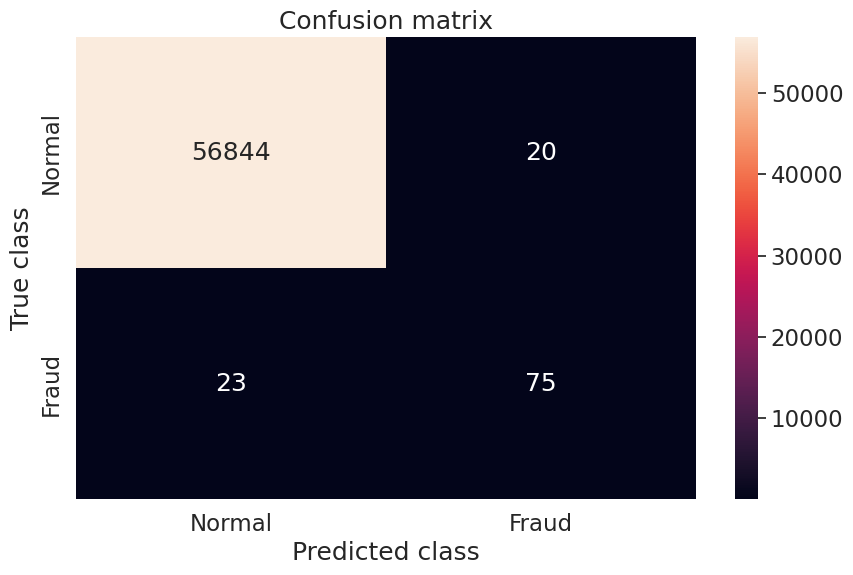

In [84]:
from sklearn.metrics import confusion_matrix

LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(10, 6))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()